### Step 1. Importing Libraries

In [1]:
# Importing necessary libraries
import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import random  # for shuffling the data
import nltk
import re  # for handling regular expressions

from nltk.stem import WordNetLemmatizer  # for lemmatizing words
from nltk.corpus import stopwords  # for stop word removal
from nltk.tokenize import word_tokenize  # for tokenizing sentences into words
nltk.download('punkt_tab')  # Downloads the 'punkt' tokenizer table used for tokenization of text into sentences or words

# Downloading necessary NLTK resources
nltk.download('stopwords')  # List of common stop words in English
nltk.download('punkt')  # Pre-trained tokenizer models
nltk.download('wordnet')  # WordNet lemmatizer dataset

# Libraries for text feature extraction and model training
from sklearn.feature_extraction.text import TfidfVectorizer  # Convert text into numerical features (TF-IDF)
from sklearn.linear_model import LogisticRegression  # Logistic regression for classification
from sklearn.svm import LinearSVC  # Support Vector Machines for classification

# Libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For model evaluation metrics
from sklearn.model_selection import KFold, cross_val_score  # For cross-validation

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dianaterraza/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Step 2. Load & Prepara the dataset

In [2]:
import pandas as pd

train_data = pd.read_csv("/Users/dianaterraza/Desktop/NLP/Data/train.csv")

In [3]:
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train_data.keys()

Index(['text', 'target'], dtype='object')

### Convert the data into Dataframe

In [5]:
df = pd.DataFrame(train_data)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
print(df.iloc[100]['text'])

.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad


In [7]:
df.iloc[120]['target']

np.int64(0)

The two categories are defined:  disaster (1) or non-disaster (0).

In [8]:
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

Look for the null values 

In [9]:
df.isnull().sum()

text      0
target    0
dtype: int64

Visualize the negatives and positives numbers: disaster(1) or non disaster(0)

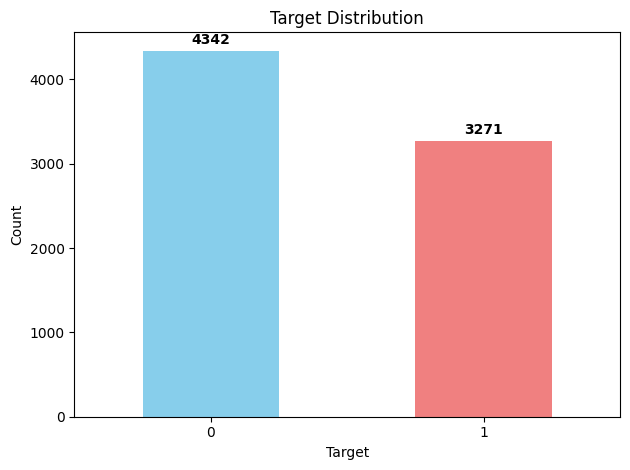

In [10]:
import matplotlib.pyplot as plt

# Get the value counts
counts = df['target'].value_counts()

# Create the bar plot
ax = counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add the count labels above each bar
for i, count in enumerate(counts):
    ax.text(i, count + (counts.max() * 0.01), f'{count}', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Step 3. Text Preprocessing

1. Converts text to lowercase.
2. Removes punctuation using regular expressions.
3. Removes extra whitespace.
4. Tokenizes sentences into words.
5. Removes stop words.
6. Lemmatizes words.

In [11]:

# Define the preprocessing function for a single text
def preprocess_text(text):
    # Check if the input is a string, if not, convert it
    if not isinstance(text, str):
        text = str(text)
        
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation using regex
    text = re.sub(r"[^\w\s]", "", text)

    # Remove extra whitespaces between words
    text = " ".join(text.split())

    # Tokenize text into words
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))  # Load English stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join tokens back into text
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

### Step 6: Apply Preprocessing

In [12]:
# Preprocess the sentences
disaster_indices = df[df['target'] == 1].index  # Assuming 1 represents disaster
non_disaster_indices = df[df['target'] == 0].index  # Assuming 0 represents non-disaster

# Apply preprocessing to the entire dataframe first
df['processed_text'] = df['text'].apply(preprocess_text)

# Then split into disaster and non-disaster texts
disaster_text = df.loc[disaster_indices, 'processed_text'].tolist()
non_disaster_text = df.loc[non_disaster_indices, 'processed_text'].tolist()

# Print the first preprocessed non-disaster sentence
print(non_disaster_text[0])

whats man


In [13]:
disaster_text

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 '13000 people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy 20 closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'im top hill see fire wood',
 'there emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding',
 'raining flooding florida tampabay tampa 18 19 day ive lost count',
 'flood bago myanmar arrived bago',
 'damage school bus 80 multi car crash breaking',
 'bbcmtd wholesale market ablaze httptcolhyxeohy6c',
 'africanbaze breaking newsnigeria flag set ablaze

In [14]:
non_disaster_text

['whats man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love skiing',
 'wonderful day',
 'looooool',
 'wayi cant eat shit',
 'nyc last week',
 'love girlfriend',
 'cooool',
 'like pasta',
 'end',
 'always try bring heavy metal rt httptcoyao1e0xngw',
 'cry set ablaze',
 'plus side look sky last night ablaze httptcoqqsmshaj3n',
 'phdsquares mufc theyve built much hype around new acquisition doubt set epl ablaze season',
 'ablaze lord',
 'check httptcoroi2nsmejj httptco3tj8zjin21 httptcoyduixefipe httptcolxtjc87kls nsfw',
 'outside youre ablaze alive youre dead inside',
 'awesome time visiting cfc head office ancop site ablaze thanks tita vida taking care u',
 'soooo pumped ablaze southridgelife',
 'wanted set chicago ablaze preaching hotel httptcoo9qknbfofx',
 'gained 3 follower last week know stats grow httptcotiyulif5c6',
 'building perfect tracklist life leave street ablaze',
 'check httptcoroi2nsmejj httptco3tj8zjin21 httptcoyd

In [15]:
df.head()

,text,target,processed_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


### Step 4: Combine the sentences (disaster and non disaster)

In [16]:
# Combine preprocessed disaster and non disaster text
text_tweets = disaster_text + non_disaster_text

### Step 5: Create the labels or targets 

disaster (1) or non-disaster (0).

In [17]:
# Create a list for all labels
disaster = []
disaster.extend([0] * len(non_disaster_text))  # Label non disaster text  as 0
disaster.extend([1] * len(disaster_text))  # Label disaster text as 1

### Step 6: Shuffle Data

In [18]:
# Combine text and targets into a single list
combined = list(zip(text_tweets, disaster))

# Shuffle the combined list
random.shuffle(combined)

# Split the shuffled list back into sentences and labels
text_tweets[:], disaster[:] = zip(*combined)

### Step 7: Split Dataset

We’ll split the data into training and test sets, using 80% for training and 20% for testing.

In [19]:
# Define train-test split ratio
train_test_ratio = 0.8

# Calculate the size of the training set
train_set_size = int(train_test_ratio * len(text_tweets))

# Split data into training and test sets
X_train, X_test = text_tweets[:train_set_size], text_tweets[train_set_size:]
y_train, y_test = disaster[:train_set_size], disaster[train_set_size:]

# Print sizes of training and test sets
print("Size of training set:", len(X_train))
print("Size of test set:", len(X_test))

Size of training set: 6090
Size of test set: 1523


### Step 8: Text Vectorization

TF-IDF stands for Term Frequency-Inverse Document Frequency 

The TF-IDF Vectorizer is a widely used tool for this purpose. It transforms sentences into a sparse matrix where each row corresponds to a document (sentence) and each column represents a term (word or token).

TF-IDF tends to perform better as it accounts for the importance of words within the entire dataset.

In [20]:
# Import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the vectorizer with default parameters
tfidf_vectorizer = TfidfVectorizer()

# Transform the training data into a TF-IDF matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Check the number of samples and features
num_samples, num_features = X_train_tfidf.shape
print("#Samples: {}, #Features: {}".format(num_samples, num_features))

#Samples: 6090, #Features: 18157


### Step 9: Model Selection

Logistic Regression works well for binary classification problems like this. You can also experiment with more complex models like Random Forests or Neural Networks later on.

In [21]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression().fit(X_train_tfidf, y_train)

### Step 10: Model Evaluation

After training the model, we need to assess its performance on unseen test data. Evaluation involves transforming the test data into the same TF-IDF format as the training data, making predictions, and calculating key metrics.

In [22]:
# Transform the test data into TF-IDF format
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
# Predict the tweets for the test data
y_pred = logistic_regression_classifier.predict(X_test_tfidf)

### Generate Evaluation Report: 

In [24]:
# Import evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

# Generate and display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       891
           1       0.79      0.75      0.77       632

    accuracy                           0.81      1523
   macro avg       0.81      0.81      0.81      1523
weighted avg       0.81      0.81      0.81      1523



### Confusion Matrix 

In [26]:
import seaborn as sns # Import seaborn for data visualization.  

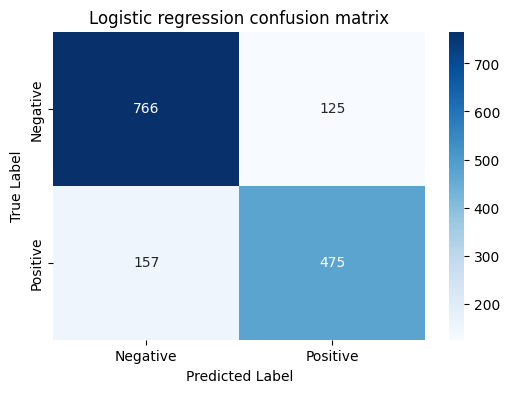

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels = ["Negative",'Positive'],
            yticklabels= ['Negative','Positive'])
plt.title('Logistic regression confusion matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Step 11: Implementing Cross Validation 

In [28]:
# Import necessary library
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Perform 10-fold cross-validation on the training data
f1_scores_list = cross_val_score(
    LogisticRegression(),            # Model: Logistic Regression
    X_train_tfidf,                   # Features: TF-IDF transformed training data
    y_train,                         # Labels: Training labels
    cv=10,                           # Number of folds
    scoring="f1"                     # Evaluation metric: F1 score
)

# Display the F1 scores for each fold
print(f"F1 Scores for each fold: {f1_scores_list}")

# Calculate and display the mean and standard deviation of the F1 scores
print("F1 Score (Mean/Average): {:.3f}".format(f1_scores_list.mean()))
print("F1 Score (Standard Deviation): {:.3f}".format(f1_scores_list.std()))

F1 Scores for each fold: [0.72916667 0.71743487 0.71457086 0.76377953 0.73053892 0.74541752
 0.72427984 0.69709544 0.72619048 0.71367521]
F1 Score (Mean/Average): 0.726
F1 Score (Standard Deviation): 0.017


### Step 12: Hyperparameter Tuning 

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# Initialize placeholders to store the best configuration
best_score = -1.0
best_classifier = None
best_ngram_size = -1

# Define the hyperparameters to test
classifiers = [LinearSVC(), LogisticRegression(solver="sag")]
ngram_sizes = [1, 2, 3, 4]

# Loop through all combinations of classifiers and n-gram sizes
for classifier in classifiers:
    for n in ngram_sizes:
        # Define the vectorizer with the current n-gram size
        vectorizer = TfidfVectorizer(ngram_range=(1, n))
        X_train_tfidf = vectorizer.fit_transform(X_train)  # Transform training data

        # Perform 10-fold cross-validation
        f1_scores = cross_val_score(classifier, X_train_tfidf, y_train, cv=10, scoring='f1')
        avg_f1_score = f1_scores.mean()  # Calculate average F1-score

        # Print the result for this combination
        print(f"Classifier: {type(classifier).__name__}, n-gram size: {n} => F1-score: {avg_f1_score:.3f}")

        # Save the best configuration
        if avg_f1_score > best_score:
            best_score = avg_f1_score
            best_classifier = classifier
            best_ngram_size = n

# Print the best configuration
print("\nBest Configuration:")
print(f"Classifier: {type(best_classifier).__name__}, Max n-gram size: {best_ngram_size}, F1-score: {best_score:.3f}")

Classifier: LinearSVC, n-gram size: 1 => F1-score: 0.753
Classifier: LinearSVC, n-gram size: 2 => F1-score: 0.756
Classifier: LinearSVC, n-gram size: 3 => F1-score: 0.742
Classifier: LinearSVC, n-gram size: 4 => F1-score: 0.729
Classifier: LogisticRegression, n-gram size: 1 => F1-score: 0.726
Classifier: LogisticRegression, n-gram size: 2 => F1-score: 0.683
Classifier: LogisticRegression, n-gram size: 3 => F1-score: 0.620
Classifier: LogisticRegression, n-gram size: 4 => F1-score: 0.561

Best Configuration:
Classifier: LinearSVC, Max n-gram size: 2, F1-score: 0.756
